In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Loading Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [14]:
data = pd.read_csv("CarPrice_Assignment.csv")

**Checking for Null in Dataset**

In [15]:
data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

# **Removing and seprating labels**

In [16]:
del data['car_ID']
labels = data.pop('price')
labels.astype('int16')
data.loc[3,'CarName'] = 'audi 100ls'

# **Checking objects datatypes in dataframe**

In [17]:
data_with_object_dtype = data.dtypes[data.dtypes == 'object']
data_with_object_dtype = list(data_with_object_dtype.keys())
data_with_object_dtype

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

## **One Hot Encode and vertorizing**

In [18]:
New_data = pd.get_dummies(data, columns=data_with_object_dtype)

In [19]:
New_data.iloc[:,1:14] -= (New_data.iloc[:,1:14]).mean()
New_data.iloc[:,1:14] /= (New_data.iloc[:,1:14]).std()
New_data.iloc[:,1:14]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725
1,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725
2,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,0.602571,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938
3,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.430023,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087
4,0.106848,0.206750,0.229440,0.235366,0.515545,0.218350,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.717669,1.195622,1.394830,0.726460,0.761377,0.338419,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.339264,-0.399512
201,1.717669,1.195622,1.348215,0.726460,0.947672,0.338419,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.950684,-0.835151
202,1.717669,1.195622,1.394830,0.726460,0.876611,1.106861,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.103540,-1.125577
203,1.717669,1.195622,1.394830,0.726460,1.270327,0.434474,-1.180593,0.461055,3.236992,0.047616,-0.681618,0.119302,-0.544725


In [20]:
data_len = len(New_data)
train_data = New_data.iloc[:data_len*70//100]
test_data = New_data.iloc[data_len*70//100:]

labels_len = len(labels)
train_labels = labels.iloc[:labels_len*70//100]
test_labels = labels.iloc[labels_len*70//100:]

In [21]:
New_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,CarName_vw dasher,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,-2.017898e-14,-1.011440e-14,1.431700e-14,-1.499613e-14,1.261863e-16,4.034713e-17,-5.910719e-15,1.766473e-14,-5.315531e-16,1.775003e-16,3.103209e-16,1.223953e-16,1.792604e-16,0.004878,0.004878,0.004878,0.004878,0.014634,0.004878,0.004878,0.004878,0.004878,0.009756,0.004878,0.009756,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,...,0.004878,0.004878,0.097561,0.902439,0.819512,0.180488,0.560976,0.439024,0.029268,0.039024,0.341463,0.468293,0.121951,0.043902,0.585366,0.370732,0.985366,0.014634,0.058537,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.024390,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.069843,0.069843,0.069843,0.069843,0.120377,0.069843,0.069843,0.069843,0.069843,0.098531,0.069843,0.098531,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,...,0.069843,0.069843,0.297446,0.297446,0.385535,0.385535,0.497483,0.497483,0.168970,0.194127,0.475361,0.500215,0.328031,0.205380,0.493865,0.484183,0.120377,0.120377,0.235330,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.154635,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,-2.018771e+00,-2.670706e+00,-2.614113e+00,-2.424729e+00,-2.05032

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers
def Train_Me_with(activation_function="relu"):
  network = models.Sequential()
  network.add(layers.Dense(24, activation=activation_function,input_shape=(train_data.shape[1],)))
  network.add(layers.Dense(18, activation=activation_function))
  network.add(layers.Dense(12, activation=activation_function))
  network.add(layers.Dense(1))
  network.compile(
      optimizer="rmsprop",
      loss="mse",
      metrics=['mae']
  )
  return network

# **MAE without K fold and with tanh**

In [23]:
Model_Results1 = Train_Me_with(activation_function="tanh").fit(
      train_data,train_labels,batch_size=32,epochs=500,validation_data=(test_data,test_labels)
  )

Epoch 1/500
5/5 [==============================] - 3s 73ms/step - loss: 281742960.0000 - mae: 14084.1309 - val_loss: 146551984.0000 - val_mae: 11350.7119
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 278465114.6667 - mae: 14100.9157 - val_loss: 146535856.0000 - val_mae: 11350.0264
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 271912408.0000 - mae: 13968.5311 - val_loss: 146522096.0000 - val_mae: 11349.4180
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 260589357.3333 - mae: 13738.5286 - val_loss: 146509776.0000 - val_mae: 11348.8672
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 278017621.3333 - mae: 14131.9033 - val_loss: 146499232.0000 - val_mae: 11348.3818
Epoch 6/500
5/5 [==============================] - 0s 9ms/step - loss: 285466882.6667 - mae: 14134.2671 - val_loss: 146490400.0000 - val_mae: 11347.9717
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 3189939

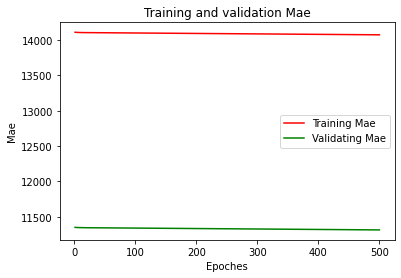

In [24]:
history_dict = Model_Results1.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()

In [25]:
history_dict = Model_Results1.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
mini = np.min(val_acc_values)
avrg = (maxi+mini)/2
print(f"FOR MODEL1 Average Validation Absolute Error = {avrg}")

FOR MODEL1 Average Validation Absolute Error = 11332.6953125


# **MAE without K fold and with selu**

In [26]:
Model_Results2 = Train_Me_with(activation_function="selu").fit(
      train_data,train_labels,batch_size=20,epochs=500,validation_data=(test_data,test_labels)
  )

Epoch 1/500
8/8 [==============================] - 1s 32ms/step - loss: 280999872.0000 - mae: 14351.2556 - val_loss: 146549728.0000 - val_mae: 11350.7207
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 267881758.2222 - mae: 13879.8528 - val_loss: 146521952.0000 - val_mae: 11349.5186
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 295166645.3333 - mae: 14653.5821 - val_loss: 146491504.0000 - val_mae: 11348.2119
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 251047941.3333 - mae: 13393.1392 - val_loss: 146461648.0000 - val_mae: 11346.8652
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 280170830.2222 - mae: 14252.5519 - val_loss: 146431952.0000 - val_mae: 11345.5449
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 301666748.4444 - mae: 14622.4741 - val_loss: 146400320.0000 - val_mae: 11344.1934
Epoch 7/500
8/8 [==============================] - 0s 8ms/step - loss: 286450218.

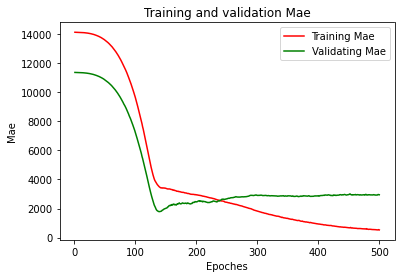

In [27]:
history_dict = Model_Results2.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()

In [28]:
history_dict = Model_Results2.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
mini = np.min(val_acc_values)
avrg = (maxi+mini)/2
print(f"FOR MODEL1 Average Validation Absolute Error = {avrg}")

FOR MODEL1 Average Validation Absolute Error = 6569.700622558594


# **MAE without K fold and with gelu**

In [29]:
Model_Results3 = Train_Me_with(activation_function="gelu").fit(
      train_data,train_labels,batch_size=20,epochs=500,validation_data=(test_data,test_labels)
  )

Epoch 1/500
8/8 [==============================] - 1s 35ms/step - loss: 304329774.2222 - mae: 14711.4377 - val_loss: 146559408.0000 - val_mae: 11350.9785
Epoch 2/500
8/8 [==============================] - 0s 8ms/step - loss: 258432247.1111 - mae: 13679.1426 - val_loss: 146543056.0000 - val_mae: 11350.3359
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 271233600.0000 - mae: 13816.2744 - val_loss: 146521600.0000 - val_mae: 11349.4932
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 266095395.5556 - mae: 13936.7185 - val_loss: 146501136.0000 - val_mae: 11348.6523
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 285284400.0000 - mae: 14287.2706 - val_loss: 146472432.0000 - val_mae: 11347.4980
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 258663710.2222 - mae: 13658.5700 - val_loss: 146443600.0000 - val_mae: 11346.3125
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 286115957.

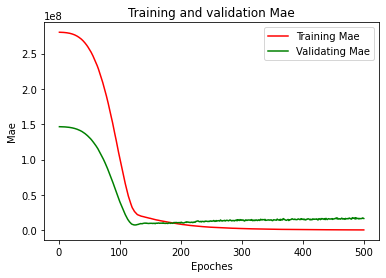

In [30]:
history_dict = Model_Results3.history
mae_values = history_dict['loss']
val_mae_values = history_dict['val_loss']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()

In [31]:
history_dict = Model_Results3.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
mini = np.min(val_acc_values)
avrg = (maxi+mini)/2
print(f"FOR MODEL1 Average Validation Absolute Error = {avrg}")

FOR MODEL1 Average Validation Absolute Error = 6719.3985595703125


# **MAE without K fold and with relu**

In [32]:
Model_Results4 = Train_Me_with(activation_function="relu").fit(
      train_data,train_labels,batch_size=20,epochs=500,validation_data=(test_data,test_labels)
  )

Epoch 1/500
8/8 [==============================] - 1s 31ms/step - loss: 291089546.6667 - mae: 14361.0438 - val_loss: 146567792.0000 - val_mae: 11351.2930
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 261262796.4444 - mae: 13499.8126 - val_loss: 146564480.0000 - val_mae: 11351.1494
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 256342179.5556 - mae: 13557.5787 - val_loss: 146560240.0000 - val_mae: 11350.9688
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 282112168.8889 - mae: 14076.3043 - val_loss: 146554400.0000 - val_mae: 11350.7197
Epoch 5/500
8/8 [==============================] - 0s 8ms/step - loss: 289182865.7778 - mae: 14520.0056 - val_loss: 146546080.0000 - val_mae: 11350.3643
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 244307443.5556 - mae: 13231.0567 - val_loss: 146533200.0000 - val_mae: 11349.8418
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 249423777.

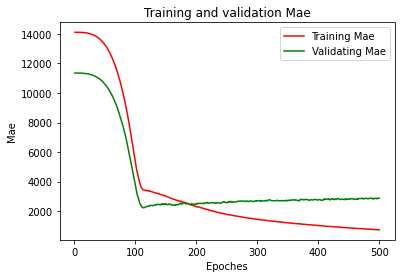

In [33]:
history_dict = Model_Results4.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()

In [34]:
history_dict = Model_Results4.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
mini = np.min(val_acc_values)
avrg = (maxi+mini)/2
print(f"FOR MODEL1 Average Validation Absolute Error = {avrg}")

FOR MODEL1 Average Validation Absolute Error = 6792.150146484375


# **MAE with K fold and with relu**

In [35]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = Train_Me_with('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_relu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# **MAE with K fold and with gelu**

In [36]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_gelu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = Train_Me_with('gelu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_gelu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# **MAE with K fold and with selu**

In [37]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_selu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = Train_Me_with('selu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_selu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# **MAE with K fold and with tanh**

In [38]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = Train_Me_with('tanh')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# **Averages**

In [39]:
print(f"Using activation function relu {np.average(all_scores_relu)}")
print(f"Using activation function tanh {np.average(all_scores_tanh)}")
print(f"Using activation function gelu {np.average(all_scores_gelu)}")
print(f"Using activation function selu {np.average(all_scores_selu)}")

Using activation function relu 2697.8213500976562
Using activation function tanh 14131.515625
Using activation function gelu 2673.734649658203
Using activation function selu 2751.7901611328125


# **So Outcome of after all struggle**

Relu functions give better results amoung all other //\\\ Now paying with epochs

In [54]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 200
all_scores_K_relu = []
model = Train_Me_with('relu')
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  Model_Results = model.fit(partial_train_data, partial_train_targets,epochs = num_epochs, batch_size=1,verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_K_relu.append(val_mae)
  history_dict = Model_Results.history
  mae_values = history_dict['mae']
print(f"On Eveluation Average using RELU and having {num_epochs} epoches is {np.average(all_scores_K_relu)}")

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
On Eveluation Average using RELU and having 200 epoches is 1329.468505859375


# **Prediction obtained**

In [55]:
Predicted_val = model.predict(test_data)

In [56]:
y_pred = Predicted_val.flatten()
y_true = test_labels


(500.0, 30000.0)

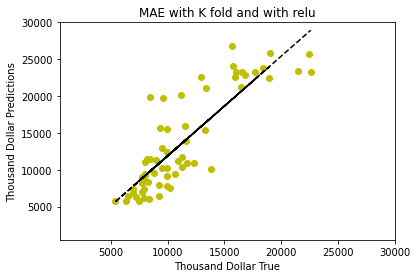

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
coef = np.polyfit(y_true,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.figure()
plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.title('MAE with K fold and with relu')
plt.xlabel('Thousand Dollar True' )
plt.ylabel('Thousand Dollar Predictions' )
plt.xlim(500, 30000)
plt.ylim(500, 30000)

In [58]:
print(f"On Eveluation Average using RELU is {np.average(all_scores_K_relu)}")

On Eveluation Average using RELU is 1329.468505859375
